In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### The only dataset we want from this csv is the name, address, lat, lon and rating, hence we would have to filter it off accordingly

In [2]:
#entering dataset
sg_res = pd.read_csv('Grab SG Restaurants.csv')
sg_res.head()

,id_source,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,image_url,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time
0,SGDD01085,Texas Chicken,Texas Chicken - VivoCity,Singapore,"[""Western"", ""Fast Food"", ""Halal"", ""Chicken"", ""...",SGD,570.0,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,3.8,1591.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0
1,4-CYTDLPUJEP53N6,Subway,Subway - Vivocity,Singapore,"[""Healthy"", ""Sandwiches"", ""Fast Food"", ""Halal""...",SGD,570.0,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",https://d1sag4ddilekf6.cloudfront.net/compress...,3000,4.2,197.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0
2,SGDD05605,LiHO Tea,LiHO Tea - Vivo City,Singapore,"[""Same Prices In-Store"", ""Beverages"", ""Local"",...",SGD,560.0,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,4.5,353.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0
3,SGDD07548,Wingstop,Wingstop - VivoCity,Singapore,"[""Halal"", ""Chicken"", ""Fast Food"", ""Burger"", ""W...",SGD,560.0,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,4.4,1391.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0
4,4-CY2ZLZLTT2EDJ2,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,Singapore,"[""Japanese"", ""Ramen"", ""Noodles"", ""Asian""]",SGD,570.0,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,4.6,309.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,44.0


In [4]:
#let us focus on the ratings first

important_df = sg_res[['name','rating','reviews_nr']].copy()


In [7]:
important_df.head() #reveals our df

,name,rating,reviews_nr
0,Texas Chicken,3.8,1591.0
1,Subway,4.2,197.0
2,LiHO Tea,4.5,353.0
3,Wingstop,4.4,1391.0
4,Le Shrimp Ramen,4.6,309.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib  inline


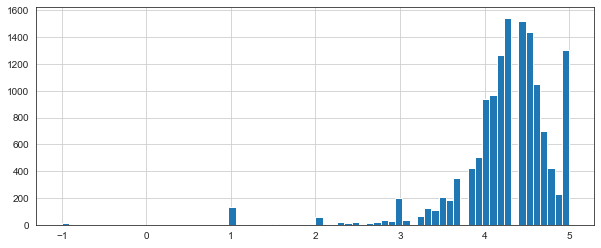

In [12]:
#rating
plt.figure(figsize = (10,4))
important_df['rating'].hist(bins = 70)
plt.show()

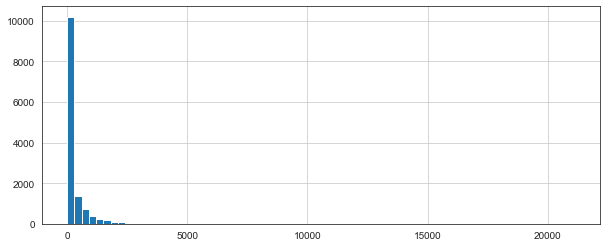

In [13]:
#number of rating
plt.figure(figsize = (10,4))
important_df['reviews_nr'].hist(bins = 70)
plt.show()

In [3]:
#immediately jumping straight to filtering off the ratings only
import pandas as pd
import geopandas
location_res = sg_res[['name','address','lat','lon','rating']].copy()
location_res.head()
# we will use lat and lon to get the location... then represent them as addresses to the people 

#implementing combined coords into df
coords = []
for i,n in enumerate(location_res['name']):
    a = [location_res['lat'][i],location_res['lon'][i]]
    coords.append(a)
location_res['coordinates'] = coords
location_res.head(5)

,name,address,lat,lon,rating,coordinates
0,Texas Chicken,Texas Chicken - VivoCity,1.264792,103.822103,3.8,"[1.2647917455551152, 103.82210285559164]"
1,Subway,Subway - Vivocity,1.264741,103.822072,4.2,"[1.2647407805011284, 103.82207197855752]"
2,LiHO Tea,LiHO Tea - Vivo City,1.264309,103.821369,4.5,"[1.2643088376947134, 103.82136934828549]"
3,Wingstop,Wingstop - VivoCity,1.263527,103.821712,4.4,"[1.263526797990238, 103.8217115875525]"
4,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,1.264810,103.822554,4.6,"[1.2648103241394182, 103.82255383456544]"


In [4]:
#find town
f = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

latest = f.loc[f['month'].str.contains('2022-04')].reset_index()
del latest['index']
del latest['month']
town = f.drop_duplicates(subset = 'town')
#lat and lon
lat = [1.369115,1.323604,1.352585,1.359029,1.281905,1.377414,1.329411,1.284484,1.38398,1.316181,1.320054,1.361218,1.332857,1.34039,1.324513,1.301969,1.372094,1.398446,1.294166,1.449111,1.386812,1.355357,1.349591,1.334304,1.438192,1.430368]
lon = [103.845434,103.927341,103.835212,103.76368,103.823918,103.77195,103.802078,103.851345,103.746961,103.764938,103.891775,103.886253,103.743552,103.708988,103.857225,103.897082,103.947373,103.907205,103.786127,103.818495,103.891443,103.867871,103.956788,103.856327,103.78896,103.835363]
#finding out all the towns in Singapore + lan and lon
town_list = []
for i in town['town']:
    town_list.append([i])

town_only = pd.DataFrame(town_list,columns = ['town'])
town_only['lat'] = lat
town_only['lon'] = lon
#combined coords
coords = []
for i,n in enumerate(town_only['town']):
    a = [town_only['lat'][i],town_only['lon'][i]]
    coords.append(a)
town_only['coordinates'] = coords
town_only

,town,lat,lon,coordinates
0,ANG MO KIO,1.369115,103.845434,"[1.369115, 103.845434]"
1,BEDOK,1.323604,103.927341,"[1.323604, 103.927341]"
2,BISHAN,1.352585,103.835212,"[1.352585, 103.835212]"
3,BUKIT BATOK,1.359029,103.763680,"[1.359029, 103.76368]"
4,BUKIT MERAH,1.281905,103.823918,"[1.281905, 103.823918]"
5,BUKIT PANJANG,1.377414,103.771950,"[1.377414, 103.77195]"
6,BUKIT TIMAH,1.329411,103.802078,"[1.329411, 103.802078]"
7,CENTRAL AREA,1.284484,103.851345,"[1.284484, 103.851345]"
8,CHOA CHU KANG,1.383980,103.746961,"[1.38398, 103.746961]"
9,CLEMENTI,1.316181,103.764938,"[1.316181, 103.764938]"


### Since we have filtered off the necessary datasets, we can now start the machine learning using sklearn

### We will be using k means clustering (unsupervised form of machine learning)
#### The idea is to find the centroids of each location (26 centroids since there are 26 towns in our towns csv)

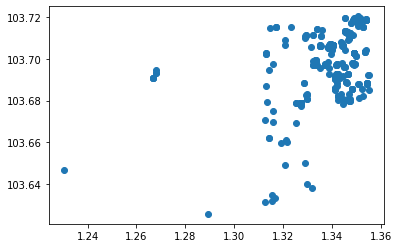

In [5]:
from sklearn import cluster

# plot 0
kmeans = cluster.KMeans(n_clusters = 26)
label = kmeans.fit_predict(location_res[['lat','lon']])
filtered_label0 = location_res[label == 0]
## Single label 
plt.scatter(filtered_label0.iloc[:,2],filtered_label0.iloc[:,3])
plt.show()

In [6]:
#finding out the coordinates of all the clusters
centroids = kmeans.cluster_centers_
centroids

array([[  1.33938656, 103.70000901],
       [  1.30259983, 103.85657994],
       [  1.36652104, 103.88863686],
       [  1.43766672, 103.78684496],
       [  1.34610225, 103.97167009],
       [  1.30381352, 103.79283201],
       [  1.31472732, 103.89933978],
       [  1.35205992, 103.75260566],
       [  1.36435134, 103.84411256],
       [  1.42716893, 103.83719146],
       [  1.28269047, 103.84473623],
       [  1.32811119, 103.84862807],
       [  1.3259561 , 103.93178741],
       [  1.33490875, 103.73812958],
       [  1.40200196, 103.90584085],
       [  1.32522747, 103.88109009],
       [  1.27804961, 103.81487344],
       [  1.37373008, 103.95469873],
       [  1.31125956, 103.76469494],
       [  1.35656526, 103.87163004],
       [  1.3517824 , 103.94239798],
       [  1.38499264, 103.75591662],
       [  1.44866635, 103.8176291 ],
       [  1.33743732, 103.78366963],
       [  1.30391161, 103.83218739],
       [  1.38997463, 103.88551395]])

### Now, we will visualize the clusters on a graph using matplotlib (Scatter Plot graph)

No handles with labels found to put in legend.


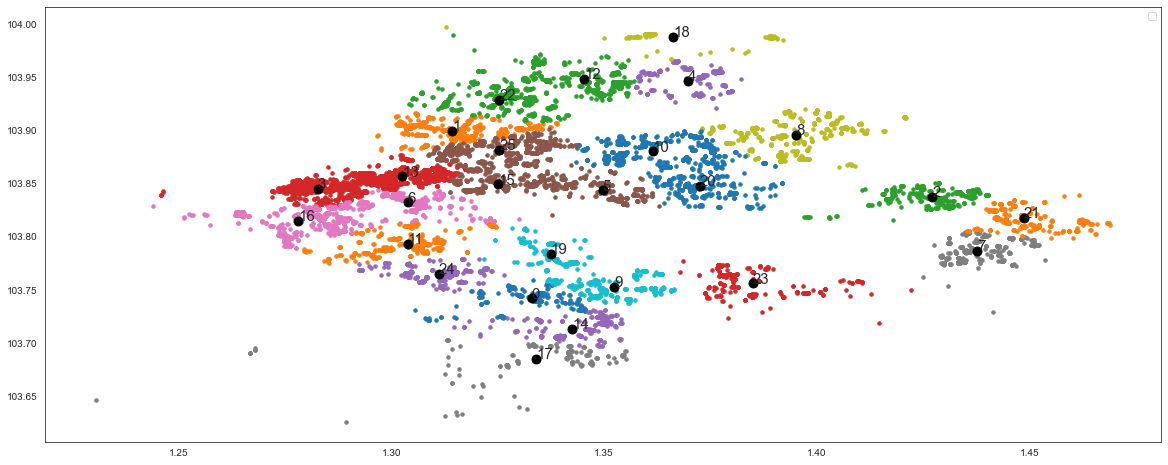

In [375]:

plt.figure(figsize = (20,8))
u_labels = np.unique(label)

for i in u_labels:
    filtered_labelI = location_res[label == i]
    plt.scatter(filtered_labelI.iloc[:,2],filtered_labelI.iloc[:,3],s = 12)
#plot annotation
annotations = [f'{i}' for i in u_labels]
plt.scatter(centroids[:,0],centroids[:,1],s = 80, color = 'black')
for i, labelling in enumerate(annotations):
    plt.annotate(labelling, (centroids[i,0], centroids[i,1]) , size = 15)
plt.legend()
plt.show()


### Based on the data we have created, we can create a small function that aids to return us the restaurants based on the town the user is in.

In [8]:

def food_recommendation(town):
    if town.upper() in town_only['town'].tolist():
        a = town_only['town'].tolist()
        index_of_town = a.index(town)
        leftbottom = town_only.iloc[index_of_town,-1]
        leftbottom = np.array(leftbottom)
        centroid_array = np.array(centroids)
        distances = np.linalg.norm(centroids-leftbottom, axis=1)
        min_index = np.argmin(distances)
        return location_res[label == min_index][['name','address','rating']]
    else:
        print("Place does not exist")

food_recommendation('BISHAN')

,name,address,rating
1001,Taste Of Thailand,Taste Of Thailand - Midview City [Islandwide D...,4.5
1006,Omote,Omote - Thomson Plaza [Islandwide Delivery],3.5
4255,Simba,Simba - Entrepreneur Centre,5.0
4284,Premium Detailing,Premium Detailing - Ang Mo Kio Ave 4,NaN
4366,Mtm Skincare,Mtm Skincare - Link@Amk,NaN
...,...,...,...
14797,Pontian Wanton Noodles,Pontian Wanton Noodles - ITE College Central,4.3
16106,Popeyes,Popeyes - Ang Mo Kio [Islandwide Delivery],4.1
16121,Xianpin Noodle House,Xianpin Noodle House - Ang Mo Kio Ave 3,4.1
16124,Angel Supermart,Angel Supermart - Ang Mo Kio Ave 4,NaN


### This is just the main foundation of the code, but it can be better improved! Instead, we use position stack api to get the coordinates of the user based on his/her input. Subsequently, Position Stack API will return us coordinates (fwd geocoding) in which we would calculate the nearest centroid based on that input! 

In [ ]:
## Saving k means cluster via pickle 
import pickle
pickle.dump(label, open("save.pkl", "wb"))

#saving the various csv (town, filtered restaurants and k mean cluster centroids)
location_res.to_csv('restaurant_loc.csv')
town_only.to_csv('town_only.csv')
centroids.to_csv('centroids.csv')